In [14]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import matplotlib.pyplot as plt
from pathlib import Path
from read_data import get_network_df, get_corrs, get_full_df
from numba.core import types
import graph_tool
import numba

from numba import njit
from graph_tool.topology import shortest_distance
import pandas as pd
import networkx as nx
import graph_tool as gt
from graph_tool.topology import shortest_distance
import numpy as np
import typing

import numba
from numba.core import types

from transport_problem import OptimParams, DualOracle, HyperParams
from subgd import OracleStacker, ustm_mincost_mcf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
T_LEN = 76
LA_LEN = 25
MU_LEN = 25

In [16]:
net_df = get_network_df(Path('SiouxFalls') / 'SiouxFalls_net.tntp')
corrs = get_corrs(Path('SiouxFalls') / 'SiouxFalls_trips.tntp') 
corrs = corrs / corrs.sum()

graph = graph_tool.Graph(net_df.values, eprops=[('capacity', 'double'), ('fft', 'double')])
graph.ep.capacity.a = graph.ep.capacity.a / corrs.sum() 

# from graph_tool.draw import graph_draw
# graph_draw(graph)


In [17]:
from transport_problem import HyperParams, DualOracle, OptimParams 
l = np.sum(corrs, axis=1)
w = np.sum(corrs, axis=0)

zones_num = len(l)
sources = np.arange(zones_num)
targets = np.arange(zones_num)

params = HyperParams(gamma=10, mu_pow=0.25, rho=0.15)
oracle = DualOracle(graph, net_df, l, w, params)
oracle_stacker = OracleStacker(oracle, graph, sources, targets)

In [23]:
t, flows_history, flows_averaged, d_history, d_avaraged, history_prime_values, history_dual_values, dgap_log,\
           cons_log, A_log, history_dual_values, history_prime_values = ustm_mincost_mcf(oracle_stacker,  eps_abs=1e-2, eps_cons_abs=1e-6, max_iter=600, stop_by_crit=False)

1
1
1
vars block grad:  39.01281840626232
t in optim params grad:  39.01281840626232 39.01281840626232
la in optim params grad:  27.324699403835027
mu in optim params grad:  27.3767048310029
norm T:  290.82297020696285
grad dF dla:  0.11352326852409254
grad dF dmu:  0.11333220509656691
start optimizing


  0%|          | 1/600 [00:00<01:35,  6.25it/s]

vars block grad:  39.01281840626232
t in optim params grad:  39.01281840626232 39.01281840626232
la in optim params grad:  0.0
mu in optim params grad:  0.0
norm T:  290.82297020696285
grad dF dla:  0.11352326852409254
grad dF dmu:  0.11333220509656691
count values below t_bar in new t:  0
vars block grad:  45.798847956876806
t in optim params grad:  45.55163842584414 45.55163842584414
la in optim params grad:  0.0
mu in optim params grad:  0.0
norm T:  375.474584559984
grad dF dla:  0.09200100598508118
grad dF dmu:  0.09194263907038362
norm (t - y):  10.001367001983313
norm t:  45.55163842584414
norm la:  3.3630901217370157
norm mu:  3.3574299294778367

vars block grad:  39.01281840626232
t in optim params grad:  39.01281840626232 39.01281840626232
la in optim params grad:  3.3630901217370157
mu in optim params grad:  3.3574299294778367
norm T:  290.82297020696285
grad dF dla:  0.11352326852409254
grad dF dmu:  0.11333220509656691
count values below t_bar in new t:  0
vars block grad:

  1%|          | 7/600 [00:00<00:19, 30.62it/s]

norm (t - y):  0.005849720123732819
norm t:  39.01400725895537
norm la:  0.007550351752011785
norm mu:  0.007537637118637123

vars block grad:  39.01382430660844
t in optim params grad:  39.013823875655355 39.013823875655355
la in optim params grad:  0.007550351752011785
mu in optim params grad:  0.007537637118637123
norm T:  290.8328277411344
grad dF dla:  0.11350336439314358
grad dF dmu:  0.11331209286726385
count values below t_bar in new t:  56
vars block grad:  39.01357489343147
t in optim params grad:  39.013574048666634 39.013574048666634
la in optim params grad:  0.004103833256764424
mu in optim params grad:  0.004096926653705448
norm T:  290.83434884066304
grad dF dla:  0.11349531674862853
grad dF dmu:  0.11330402603778672
norm (t - y):  0.002846400888621644
norm t:  39.013574048666634
norm la:  0.005745679188382211
norm mu:  0.005736005809369257

#######################################teta:  0.4348195546038235
vars block grad:  39.013558990207045
t in optim params grad:  39.0

  2%|▎         | 15/600 [00:00<00:13, 43.51it/s]

grad dF dla:  0.11279101449366379
grad dF dmu:  0.11260191451041002
norm (t - y):  0.009252046053619704
norm t:  39.013071458000816
norm la:  0.15044514151892113
norm mu:  0.15019208191836173

#######################################teta:  0.15953641735718285
vars block grad:  39.013911193537055
t in optim params grad:  39.01315439648079 39.01315439648079
la in optim params grad:  0.15044514151892113
mu in optim params grad:  0.15019208191836173
norm T:  290.826637335081
grad dF dla:  0.11268556199029126
grad dF dmu:  0.1124974690795143


  3%|▎         | 20/600 [00:00<00:12, 44.64it/s]

count values below t_bar in new t:  73
vars block grad:  39.01410545940573
t in optim params grad:  39.01322954319999 39.01322954319999
la in optim params grad:  0.17197393677104061
mu in optim params grad:  0.17168464875791123
norm T:  290.82912440548836
grad dF dla:  0.11262259086459965
grad dF dmu:  0.11243224205115883
norm (t - y):  0.018647520654510898
norm t:  39.01322954319999
norm la:  0.1850140661049285
norm mu:  0.18470301178638204

vars block grad:  39.013838703304366
t in optim params grad:  39.01313206371256 39.01313206371256
la in optim params grad:  0.1850140661049285
mu in optim params grad:  0.18470301178638204
norm T:  290.826330980134
grad dF dla:  0.11271396283329527
grad dF dmu:  0.1125255986565696
count values below t_bar in new t:  73
vars block grad:  39.0138750889574
t in optim params grad:  39.01311189600658 39.01311189600658
la in optim params grad:  0.1661772740910424
mu in optim params grad:  0.1658977406360737
norm T:  290.8266730288478
grad dF dla:  0.112

  5%|▌         | 31/600 [00:00<00:12, 43.92it/s]

norm (t - y):  0.039428500249183256
norm t:  39.01538079689552
norm la:  0.677081214792687
norm mu:  0.6759366343797849

vars block grad:  39.02406976133018
t in optim params grad:  39.013846656906054 39.013846656906054
la in optim params grad:  0.677081214792687
mu in optim params grad:  0.6759366343797849
norm T:  290.8310849876303
grad dF dla:  0.11042286823506096
grad dF dmu:  0.1102355986904969
count values below t_bar in new t:  70
vars block grad:  39.025104268694
t in optim params grad:  39.01446389078558 39.01446389078558
la in optim params grad:  0.632115187337098
mu in optim params grad:  0.6310468750593551
norm T:  290.8503248351543
grad dF dla:  0.11036191364659988
grad dF dmu:  0.11017432520526883
norm (t - y):  0.01956073159619822
norm t:  39.01446389078558
norm la:  0.6448934623104919
norm mu:  0.6438034787852407

vars block grad:  39.023642893858884
t in optim params grad:  39.01387705739721 39.01387705739721
la in optim params grad:  0.6448934623104919
mu in optim par

  7%|▋         | 44/600 [00:01<00:11, 49.03it/s]

#######################################teta:  0.08306886350623453
vars block grad:  39.04353778762346
t in optim params grad:  39.01370455915106 39.01370455915106
la in optim params grad:  0.9826324382693173
mu in optim params grad:  0.9809684762941597
norm T:  290.8341717782489
grad dF dla:  0.10818676038559041
grad dF dmu:  0.10800217055315313
count values below t_bar in new t:  73
vars block grad:  39.04543393749673
t in optim params grad:  39.01420227355231 39.01420227355231
la in optim params grad:  1.0799648495239835
mu in optim params grad:  1.0781351810646969
norm T:  290.83584802324714
grad dF dla:  0.10806229154320311
grad dF dmu:  0.1078765301075774
norm (t - y):  0.03552798842613369
norm t:  39.01420227355231
norm la:  1.1050038053373725
norm mu:  1.103131413729844

vars block grad:  39.042079254462365
t in optim params grad:  39.013735542153846 39.013735542153846
la in optim params grad:  1.1050038053373725
mu in optim params grad:  1.103131413729844
norm T:  290.834563412

  8%|▊         | 49/600 [00:01<00:12, 44.79it/s]

 0.03442881417023713
norm t:  39.01361966478247
norm la:  1.6768787913087213
norm mu:  1.6740310560251426

#######################################teta:  0.08896653524070608
vars block grad:  39.10157291592976
t in optim params grad:  39.01352814287476 39.01352814287476
la in optim params grad:  1.6768787913087213
mu in optim params grad:  1.6740310560251426
norm T:  290.8319951394235
grad dF dla:  0.10422910011082155
grad dF dmu:  0.10405199720361703
count values below t_bar in new t:  72
vars block grad:  39.10835396524621
t in optim params grad:  39.01568292432681 39.01568292432681
la in optim params grad:  1.855979627914796
mu in optim params grad:  1.8528264801797765
norm T:  290.86325142506286
grad dF dla:  0.10397583175302562
grad dF dmu:  0.10380272428180219
norm (t - y):  0.07035773662346208
norm t:  39.01568292432681
norm la:  1.9042250633701885
norm mu:  1.9009899335385194

vars block grad:  39.09691377053047
t in optim params grad:  39.01355374722285 39.01355374722285
la in 

 10%|█         | 62/600 [00:01<00:11, 48.51it/s]

vars block grad:  39.17432839453257
t in optim params grad:  39.01353117129778 39.01353117129778
la in optim params grad:  2.5035250524853097
mu in optim params grad:  2.4992705622174842
norm T:  290.832240335452
grad dF dla:  0.1008153548956663
grad dF dmu:  0.10064535155596614
norm (t - y):  0.008295481401316073
norm t:  39.01353117129778
norm la:  2.5093598785358964
norm mu:  2.5050955488468354

#######################################teta:  0.036004334877822786
vars block grad:  39.18912285575438
t in optim params grad:  39.013624955479024 39.013624955479024
la in optim params grad:  2.5093598785358964
mu in optim params grad:  2.5050955488468354
norm T:  290.833603370309
grad dF dla:  0.10021997116753428
grad dF dmu:  0.10005120634140931
count values below t_bar in new t:  74
vars block grad:  39.190546771836885
t in optim params grad:  39.01349578992661 39.01349578992661
la in optim params grad:  2.6218085445947463
mu in optim params grad:  2.617353241754848
norm T:  290.831780181

 12%|█▏        | 73/600 [00:01<00:10, 50.59it/s]

 0.09031491330306178
grad dF dmu:  0.09015507677193127
norm (t - y):  0.060345428129569244
norm t:  39.014515328851346
norm la:  4.436940805196231
norm mu:  4.429440802001777

vars block grad:  39.48773574060516
t in optim params grad:  39.013641372592424 39.013641372592424
la in optim params grad:  4.436940805196231
mu in optim params grad:  4.429440802001777
norm T:  290.83158294356963
grad dF dla:  0.09097712398449848
grad dF dmu:  0.09083108271486269
count values below t_bar in new t:  73
vars block grad:  39.492748326340475
t in optim params grad:  39.01405241706742 39.01405241706742
la in optim params grad:  4.317410844413374
mu in optim params grad:  4.310107234298529
norm T:  290.8353303293556
grad dF dla:  0.09086319316332271
grad dF dmu:  0.09071032723142125
norm (t - y):  0.030229310901333517
norm t:  39.01405241706742
norm la:  4.338461517252356
norm mu:  4.331124106892401

vars block grad:  39.47560298351463
t in optim params grad:  39.01365481940442 39.01365481940442
la i

 13%|█▎        | 79/600 [00:01<00:11, 45.91it/s]

count values below t_bar in new t:  66
vars block grad:  40.391125792552764
t in optim params grad:  39.02879420376597 39.02879420376597
la in optim params grad:  7.224510357565092
mu in optim params grad:  7.212535241824913
norm T:  290.9888223017531
grad dF dla:  0.07319222655370372
grad dF dmu:  0.07307836452862942
norm (t - y):  0.20231939837271196
norm t:  39.02879420376597
norm la:  7.361219924308023
norm mu:  7.349061641861222

vars block grad:  40.2652780078381
t in optim params grad:  39.0133678466542 39.0133678466542
la in optim params grad:  7.361219924308023
mu in optim params grad:  7.349061641861222
norm T:  290.82876769062693
grad dF dla:  0.07507209236731287
grad dF dmu:  0.07496935730108181
count values below t_bar in new t:  68
vars block grad:  40.29383503603443
t in optim params grad:  39.01770265315029 39.01770265315029
la in optim params grad:  7.050340183410721
mu in optim params grad:  7.0386394713981275
norm T:  290.8771677817411
grad dF dla:  0.074656820190528

 15%|█▌        | 91/600 [00:02<00:11, 44.81it/s]

grad dF dla:  0.06516129002046184
grad dF dmu:  0.06508906813763665
norm (t - y):  0.08573988207199998
norm t:  39.013602314510216
norm la:  8.679478990687116
norm mu:  8.665366634991498

#######################################teta:  0.0725872677940251
vars block grad:  41.1878121568091
t in optim params grad:  39.01352586545906 39.01352586545906
la in optim params grad:  8.679478990687116
mu in optim params grad:  8.665366634991498
norm T:  290.8304409078779
grad dF dla:  0.061067005147826564
grad dF dmu:  0.06100784417800813
count values below t_bar in new t:  72
vars block grad:  41.24338981097219
t in optim params grad:  39.01836724078818 39.01836724078818
la in optim params grad:  9.34510754014218
mu in optim params grad:  9.330039382174501
norm T:  290.8954872721043
grad dF dla:  0.06037309419490935
grad dF dmu:  0.060339802577026126
norm (t - y):  0.16478577390081134
norm t:  39.01836724078818
norm la:  9.45703327668255
norm mu:  9.441861181277334

vars block grad:  41.103491597

 16%|█▋        | 99/600 [00:02<00:10, 46.62it/s]

#######################################teta:  0.022240156886740827
vars block grad:  42.05681755204814
t in optim params grad:  39.01367867547924 39.01367867547924
la in optim params grad:  10.869438521936413
mu in optim params grad:  10.852473683941744
norm T:  290.831055126392
grad dF dla:  0.05037019693453273
grad dF dmu:  0.050344974311902956
count values below t_bar in new t:  74
vars block grad:  42.06279642481392
t in optim params grad:  39.01367867547924 39.01367867547924
la in optim params grad:  11.115127270226273
mu in optim params grad:  11.09787027223663
norm T:  290.831055126392
grad dF dla:  0.050305882952528885
grad dF dmu:  0.05028080349283886
norm (t - y):  0.016482518062476144
norm t:  39.01367867547924
norm la:  11.126444262924355
norm mu:  11.109183468906803

#######################################teta:  0.03096159595380221
vars block grad:  42.24726365566035
t in optim params grad:  39.01364182148685 39.01364182148685
la in optim params grad:  11.126444262924355
m

 18%|█▊        | 111/600 [00:02<00:09, 48.93it/s]

count values below t_bar in new t:  73
vars block grad:  43.92099244238495
t in optim params grad:  39.01375019075171 39.01375019075171
la in optim params grad:  14.271622699837325
mu in optim params grad:  14.251795437871502
norm T:  290.83017378655967
grad dF dla:  0.03408240077289913
grad dF dmu:  0.03408971720058475
norm (t - y):  0.005820867910356982
norm t:  39.01375019075171
norm la:  14.274914735452796
norm mu:  14.255093211663308

#######################################teta:  0.018288426062257074
vars block grad:  44.06773387842571
t in optim params grad:  39.014081795755565 39.014081795755565
la in optim params grad:  14.274914735452796
mu in optim params grad:  14.255093211663308
norm T:  290.831173506435
grad dF dla:  0.03320381806096878
grad dF dmu:  0.033211042620805875
count values below t_bar in new t:  73
vars block grad:  44.07154376417505
t in optim params grad:  39.01373335058765 39.01373335058765
la in optim params grad:  14.499038875790218
mu in optim params grad:

 20%|█▉        | 117/600 [00:02<00:09, 50.80it/s]

grad dF dla:  0.023342744942473743
grad dF dmu:  0.023321256551848753
norm (t - y):  0.12548042963163802
norm t:  39.01525950593969
norm la:  18.835323684923544
norm mu:  18.817688777013952

vars block grad:  47.06858484972466
t in optim params grad:  39.01346584087392 39.01346584087392
la in optim params grad:  18.835323684923544
mu in optim params grad:  18.817688777013952
norm T:  290.8276307836456
grad dF dla:  0.024124207020835817
grad dF dmu:  0.024097949600342405
count values below t_bar in new t:  72
vars block grad:  47.078913758007694
t in optim params grad:  39.01425626206414 39.01425626206414
la in optim params grad:  18.62897122026924
mu in optim params grad:  18.61081927570824
norm T:  290.8277368168199
grad dF dla:  0.023826980048736006
grad dF dmu:  0.023803353147914878
norm (t - y):  0.0631720295154964
norm t:  39.01425626206414
norm la:  18.64111439681658
norm mu:  18.62312495250765

#######################################teta:  0.0568829024509466
vars block grad:  47

 20%|██        | 123/600 [00:02<00:09, 49.84it/s]

#######################################teta:  0.03439410586048909
vars block grad:  49.26259163433836
t in optim params grad:  39.01406706458483 39.01406706458483
la in optim params grad:  20.951071259888348
mu in optim params grad:  20.938214939070317
norm T:  290.8268512802573
grad dF dla:  0.015593218403142423
grad dF dmu:  0.015627374113804014
count values below t_bar in new t:  72
vars block grad:  49.270340028525546
t in optim params grad:  39.01965304012918 39.01965304012918
la in optim params grad:  21.274561377808386
mu in optim params grad:  21.262609054241786
norm T:  290.8465685484859
grad dF dla:  0.015409794403522093
grad dF dmu:  0.015449022015555378


 22%|██▏       | 130/600 [00:02<00:09, 47.92it/s]

norm (t - y):  0.05139484686480955
norm t:  39.01965304012918
norm la:  21.278357071068626
norm mu:  21.266513666103542

vars block grad:  49.18185947984025
t in optim params grad:  39.014084977694765 39.014084977694765
la in optim params grad:  21.278357071068626
mu in optim params grad:  21.266513666103542
norm T:  290.8269069561721
grad dF dla:  0.015932251242749
grad dF dmu:  0.0159635479829249
count values below t_bar in new t:  72
vars block grad:  49.18553599382148
t in optim params grad:  39.016538755870094 39.016538755870094
la in optim params grad:  21.181048299789655
mu in optim params grad:  21.168837194563636
norm T:  290.8355860677175
grad dF dla:  0.015836551305512845
grad dF dmu:  0.01587003425417399
norm (t - y):  0.024931881998363856
norm t:  39.016538755870094
norm la:  21.18302973333161
norm mu:  21.170873997735296

vars block grad:  49.12437562116344
t in optim params grad:  39.014097800468384 39.014097800468384
la in optim params grad:  21.18302973333161
mu in opt

 23%|██▎       | 136/600 [00:02<00:09, 49.96it/s]

grad dF dla:  0.009661671571925528
grad dF dmu:  0.009711067380262608
count values below t_bar in new t:  74
vars block grad:  50.74260304629453
t in optim params grad:  39.01415057653661 39.01415057653661
la in optim params grad:  22.94494525700768
mu in optim params grad:  22.939458012199385
norm T:  290.82865251922675
grad dF dla:  0.009656936390717267
grad dF dmu:  0.009707145889928145
norm (t - y):  0.0023414638921568243
norm t:  39.01415057653661
norm la:  22.94514503351785
norm mu:  22.939662990026214

#######################################teta:  0.010392299116471595
vars block grad:  50.82065584446101
t in optim params grad:  39.01413114018723 39.01413114018723
la in optim params grad:  22.94514503351785
mu in optim params grad:  22.939662990026214
norm T:  290.8285696164474
grad dF dla:  0.00954195578881419
grad dF dmu:  0.009589083959422222
count values below t_bar in new t:  74
vars block grad:  50.8210179138511
t in optim params grad:  39.01413114018723 39.01413114018723
l

 24%|██▍       | 147/600 [00:03<00:09, 45.65it/s]

grad dF dla:  0.009188328115800372
grad dF dmu:  0.009187823144846601
count values below t_bar in new t:  74
vars block grad:  51.701994662699065
t in optim params grad:  39.01427891839715 39.01427891839715
la in optim params grad:  23.98935421803848
mu in optim params grad:  23.989116911711456
norm T:  290.8323326767579
grad dF dla:  0.009181970711024551
grad dF dmu:  0.009181520256851441
norm (t - y):  0.0015036723461823174
norm t:  39.01427891839715
norm la:  23.989512746091847
norm mu:  23.989280330688768

#######################################teta:  0.00948223661799655
vars block grad:  51.76996807260008
t in optim params grad:  39.014259462599746 39.014259462599746
la in optim params grad:  23.989512746091847
mu in optim params grad:  23.989280330688768
norm T:  290.83220796238413
grad dF dla:  0.009205678412721283
grad dF dmu:  0.009201424450602173
count values below t_bar in new t:  73
vars block grad:  51.77047604535227
t in optim params grad:  39.01454669671958 39.0145466967

 27%|██▋       | 160/600 [00:03<00:08, 48.92it/s]

#######################################teta:  0.024915995065581148
vars block grad:  52.60531206687807
t in optim params grad:  39.01412788028962 39.01412788028962
la in optim params grad:  24.771338664506082
mu in optim params grad:  24.776105055073877
norm T:  290.83281304270116
grad dF dla:  0.00877756893933453
grad dF dmu:  0.008745424366431736
count values below t_bar in new t:  74
vars block grad:  52.606606063288545
t in optim params grad:  39.01412788028962 39.01412788028962
la in optim params grad:  24.949107419288183
mu in optim params grad:  24.95513418867659
norm T:  290.83281304270116
grad dF dla:  0.008648791382674966
grad dF dmu:  0.008617694499010828
norm (t - y):  0.022941809222899526
norm t:  39.01412788028962
norm la:  24.950429600852395
norm mu:  24.956540024036666

#######################################teta:  0.034621199678053265
vars block grad:  52.83669563829566
t in optim params grad:  39.0140653127609 39.0140653127609
la in optim params grad:  24.950429600852

 28%|██▊       | 166/600 [00:03<00:09, 47.19it/s]

grad dF dla:  0.006260173449524007
grad dF dmu:  0.006234619243152442
count values below t_bar in new t:  74
vars block grad:  53.410344619836295
t in optim params grad:  39.01421374359557 39.01421374359557
la in optim params grad:  25.78624461122805
mu in optim params grad:  25.799866538186873
norm T:  290.8348954442393
grad dF dla:  0.006250086488417208
grad dF dmu:  0.006224442949285842
norm (t - y):  0.0028249979955344623
norm t:  39.01421374359557
norm la:  25.786166576109405
norm mu:  25.79979945053552

#######################################teta:  0.011207532898307357
vars block grad:  53.478034800290956
t in optim params grad:  39.01419180092461 39.01419180092461
la in optim params grad:  25.786166576109405
mu in optim params grad:  25.79979945053552
norm T:  290.8347079182074
grad dF dla:  0.006014798954170355
grad dF dmu:  0.005990377786339685
count values below t_bar in new t:  73
vars block grad:  53.47860323695923
t in optim params grad:  39.015227709180564 39.015227709180

 28%|██▊       | 171/600 [00:03<00:09, 46.14it/s]

norm (t - y):  0.0017623671686997939
norm t:  39.01455699214543
norm la:  26.277007461247877
norm mu:  26.296456447849838

#######################################teta:  0.01056408120322599
vars block grad:  53.946630331305336
t in optim params grad:  39.01472916183761 39.01472916183761
la in optim params grad:  26.277007461247877
mu in optim params grad:  26.296456447849838
norm T:  290.8380039668481
grad dF dla:  0.0044839776287744215
grad dF dmu:  0.00446981957432389
count values below t_bar in new t:  72


 30%|██▉       | 178/600 [00:03<00:09, 46.81it/s]

vars block grad:  53.94719448517454
t in optim params grad:  39.016287526576185 39.016287526576185
la in optim params grad:  26.334624017750844
mu in optim params grad:  26.354836565129208
norm T:  290.89479079946125
grad dF dla:  0.0044846803552423715
grad dF dmu:  0.0044701697796897
norm (t - y):  0.024336805333946443
norm t:  39.016287526576185
norm la:  26.334036404576043
norm mu:  26.354271515396622

vars block grad:  53.93006913769496
t in optim params grad:  39.01467899693067 39.01467899693067
la in optim params grad:  26.334036404576043
mu in optim params grad:  26.354271515396622
norm T:  290.8378539603887
grad dF dla:  0.004514777269276902
grad dF dmu:  0.0045003200840051235
count values below t_bar in new t:  72
vars block grad:  53.93020498640244
t in optim params grad:  39.015246057198596 39.015246057198596
la in optim params grad:  26.317813286722895
mu in optim params grad:  26.33780332085818
norm T:  290.8605510559819
grad dF dla:  0.004513941210961841
grad dF dmu:  0.0

 32%|███▏      | 191/600 [00:04<00:08, 48.46it/s]

norm (t - y):  0.11265504901571953
norm t:  39.01417035255693
norm la:  27.15412611855866
norm mu:  27.193602624733092

#######################################teta:  0.07174488424954245
vars block grad:  54.92021929295314
t in optim params grad:  39.01403995785977 39.01403995785977
la in optim params grad:  27.15412611855866
mu in optim params grad:  27.193602624733092
norm T:  290.83371675975854
grad dF dla:  0.004696180662278445
grad dF dmu:  0.004684974821206819
count values below t_bar in new t:  72
vars block grad:  54.952450435113604
t in optim params grad:  39.147622035766325 39.147622035766325
la in optim params grad:  27.30966947974988
mu in optim params grad:  27.35538569019642
norm T:  293.8837373777564
grad dF dla:  0.005393103571014616
grad dF dmu:  0.0053875883229573505
norm (t - y):  1.478983690095298
norm t:  39.147622035766325
norm la:  27.24623792224401
norm mu:  27.2924534780747

vars block grad:  54.875020511429895
t in optim params grad:  39.01407677052414 39.01407

 33%|███▎      | 196/600 [00:04<00:09, 44.70it/s]

grad dF dla:  0.003965766836964689
grad dF dmu:  0.003955834436268574
count values below t_bar in new t:  72
vars block grad:  54.90887992497078
t in optim params grad:  39.01584262183921 39.01584262183921
la in optim params grad:  27.302491419576473
mu in optim params grad:  27.35079442502333
norm T:  290.84987143430726
grad dF dla:  0.003892009627318675
grad dF dmu:  0.0038815493154692533
norm (t - y):  0.0321504060803839
norm t:  39.01584262183921
norm la:  27.295676232435547
norm mu:  27.34401539892757

vars block grad:  54.90544039241794
t in optim params grad:  39.014079044045296 39.014079044045296
la in optim params grad:  27.295676232435547
mu in optim params grad:  27.34401539892757
norm T:  290.83539308335156
grad dF dla:  0.004028214281228267
grad dF dmu:  0.004018177497236149
count values below t_bar in new t:  72
vars block grad:  54.902124882726966
t in optim params grad:  39.01426426632469 39.01426426632469
la in optim params grad:  27.29380903959591
mu in optim params g

 34%|███▍      | 207/600 [00:04<00:08, 45.22it/s]

grad dF dla:  0.0032144072581328734
grad dF dmu:  0.003188804996721249
norm (t - y):  0.032888731476621184
norm t:  39.01890453583209
norm la:  27.332703697454395
norm mu:  27.38701488920341

vars block grad:  54.94791463585076
t in optim params grad:  39.014011017766244 39.014011017766244
la in optim params grad:  27.332703697454395
mu in optim params grad:  27.38701488920341
norm T:  290.83463657914115
grad dF dla:  0.0032537553589499016
grad dF dmu:  0.0032407148822417046
count values below t_bar in new t:  73
vars block grad:  54.948255825410726
t in optim params grad:  39.01630958803118 39.01630958803118
la in optim params grad:  27.333397039448872
mu in optim params grad:  27.387326876097333
norm T:  290.84242845461506
grad dF dla:  0.0032463607902704357
grad dF dmu:  0.003227597836888244
norm (t - y):  0.015521522178731229
norm t:  39.01630958803118
norm la:  27.332102277430803
norm mu:  27.386029092983733

vars block grad:  54.94649385925562
t in optim params grad:  39.01401666

 36%|███▌      | 214/600 [00:04<00:08, 47.24it/s]

grad dF dla:  0.003090424517274433
grad dF dmu:  0.003072357310446452
count values below t_bar in new t:  74
vars block grad:  54.947999986627984
t in optim params grad:  39.01410345731957 39.01410345731957
la in optim params grad:  27.332913210738663
mu in optim params grad:  27.39167410466628
norm T:  290.8349526886109
grad dF dla:  0.00307028817840803
grad dF dmu:  0.003052507053566693
norm (t - y):  0.0080685835003158
norm t:  39.01410345731957
norm la:  27.331012430408965
norm mu:  27.389746137576083

#######################################teta:  0.02165017605854079
vars block grad:  54.94456452780175
t in optim params grad:  39.01406470782756 39.01406470782756
la in optim params grad:  27.331012430408965
mu in optim params grad:  27.389746137576083
norm T:  290.83459137807966
grad dF dla:  0.003132337594076323
grad dF dmu:  0.0031145632317177195
count values below t_bar in new t:  74
vars block grad:  54.94111105275069
t in optim params grad:  39.01406470782756 39.01406470782756


 38%|███▊      | 227/600 [00:04<00:07, 51.41it/s]

#######################################teta:  0.014597475864956966
vars block grad:  54.912215639661945
t in optim params grad:  39.01399300457114 39.01399300457114
la in optim params grad:  27.301048532580978
mu in optim params grad:  27.363889224003373
norm T:  290.8343284675724
grad dF dla:  0.003175393796282415
grad dF dmu:  0.0031666792048657137
count values below t_bar in new t:  73
vars block grad:  54.91226921003517
t in optim params grad:  39.01612576443162 39.01612576443162
la in optim params grad:  27.29270765862562
mu in optim params grad:  27.356313438707478
norm T:  290.9111821321148
grad dF dla:  0.00312682420880027
grad dF dmu:  0.003149441975982958
norm (t - y):  0.042009657665422646
norm t:  39.01612576443162
norm la:  27.291260458615415
norm mu:  27.354823024641295

vars block grad:  54.91450262495618
t in optim params grad:  39.014000128263085 39.014000128263085
la in optim params grad:  27.291260458615415
mu in optim params grad:  27.354823024641295
norm T:  290.83

 40%|███▉      | 239/600 [00:05<00:07, 45.56it/s]

count values below t_bar in new t:  73
vars block grad:  54.512692730357735
t in optim params grad:  39.02412500219098 39.02412500219098
la in optim params grad:  26.893419065656822
mu in optim params grad:  26.95856220726128
norm T:  291.01037169817533
grad dF dla:  0.0017179499785799726
grad dF dmu:  0.0017581486163921285
norm (t - y):  0.19859709441061668
norm t:  39.02412500219098
norm la:  26.881826971118183
norm mu:  26.946590048142145

vars block grad:  54.53679758023033
t in optim params grad:  39.01366501288942 39.01366501288942
la in optim params grad:  26.881826971118183
mu in optim params grad:  26.946590048142145
norm T:  290.83156531206754
grad dF dla:  0.0018291440173893426
grad dF dmu:  0.0018504967507962768
count values below t_bar in new t:  73
vars block grad:  54.532658223896036
t in optim params grad:  39.0161722813538 39.0161722813538
la in optim params grad:  26.91352925730206
mu in optim params grad:  26.978846815336837
norm T:  290.875715453311
grad dF dla:  0.

 41%|████      | 247/600 [00:05<00:06, 53.29it/s]

grad dF dla:  0.0017136450462338741
grad dF dmu:  0.001728909378337861
count values below t_bar in new t:  73
vars block grad:  54.45024745079881
t in optim params grad:  39.01502988335893 39.01502988335893
la in optim params grad:  26.826127150805345
mu in optim params grad:  26.890216082204127
norm T:  290.8368924010749
grad dF dla:  0.001708408358118976
grad dF dmu:  0.0017239156582476312
norm (t - y):  0.009243073002044083
norm t:  39.01502988335893
norm la:  26.82550683407377
norm mu:  26.88957184019287

vars block grad:  54.455889732244245
t in optim params grad:  39.014028789714004 39.014028789714004
la in optim params grad:  26.82550683407377
mu in optim params grad:  26.88957184019287
norm T:  290.8335905234261
grad dF dla:  0.0017173245856714774
grad dF dmu:  0.0017330596837666222
count values below t_bar in new t:  73
vars block grad:  54.45585622427126
t in optim params grad:  39.01442261802432 39.01442261802432
la in optim params grad:  26.831900862871912
mu in optim param

 42%|████▏     | 253/600 [00:05<00:07, 43.97it/s]

grad dF dla:  0.001425419238029166
grad dF dmu:  0.0014120503244087557
norm (t - y):  0.002423899782187186
norm t:  39.01419828845469
norm la:  26.47111875114223
norm mu:  26.52672683152616

vars block grad:  54.09868970681729
t in optim params grad:  39.013890191279955 39.013890191279955
la in optim params grad:  26.47111875114223
mu in optim params grad:  26.52672683152616
norm T:  290.83178528115235
grad dF dla:  0.001425198342071764
grad dF dmu:  0.0014126358683838938
count values below t_bar in new t:  73
vars block grad:  54.09876901884269
t in optim params grad:  39.013999771624604 39.013999771624604
la in optim params grad:  26.472949535455154
mu in optim params grad:  26.528617435337505
norm T:  290.83239746907066
grad dF dla:  0.0014250827585265287
grad dF dmu:  0.001412284663690612
norm (t - y):  0.0008628068108199691
norm t:  39.013999771624604
norm la:  26.47295049281689
norm mu:  26.528617064947714

#######################################teta:  0.002684246655675318
vars b

 45%|████▍     | 268/600 [00:05<00:07, 47.18it/s]

grad dF dla:  0.001073576099171227
grad dF dmu:  0.0010590308517296255
count values below t_bar in new t:  73
vars block grad:  53.82380349252712
t in optim params grad:  39.02564404763573 39.02564404763573
la in optim params grad:  26.188594990296092
mu in optim params grad:  26.229335071012798
norm T:  291.0626089644881
grad dF dla:  0.0010661753533413132
grad dF dmu:  0.00102343082596362
norm (t - y):  0.15022716648178025
norm t:  39.02564404763573
norm la:  26.190340880449554
norm mu:  26.23103073909339

vars block grad:  53.82065800020277
t in optim params grad:  39.01384654700256 39.01384654700256
la in optim params grad:  26.190340880449554
mu in optim params grad:  26.23103073909339
norm T:  290.83077006960804
grad dF dla:  0.0010868875257215977
grad dF dmu:  0.001071733977600744
count values below t_bar in new t:  73
vars block grad:  53.82519267313188
t in optim params grad:  39.018930371936065 39.018930371936065
la in optim params grad:  26.195603728718375
mu in optim params

 46%|████▌     | 273/600 [00:05<00:07, 45.22it/s]

count values below t_bar in new t:  73
vars block grad:  53.79972307415409
t in optim params grad:  39.01540144606642 39.01540144606642
la in optim params grad:  26.173833645816288
mu in optim params grad:  26.213141880544033
norm T:  290.8569552045248
grad dF dla:  0.0010178155435517314
grad dF dmu:  0.0010045886900719666
norm (t - y):  0.020006276539841026
norm t:  39.01540144606642
norm la:  26.17393283749815
norm mu:  26.213238881833792

vars block grad:  53.800013101241134
t in optim params grad:  39.01386084056809 39.01386084056809
la in optim params grad:  26.17393283749815
mu in optim params grad:  26.213238881833792
norm T:  290.8314148961846
grad dF dla:  0.0010196317911161366
grad dF dmu:  0.0010067690967238284
count values below t_bar in new t:  73
vars block grad:  53.80060825167056
t in optim params grad:  39.01461522099862 39.01461522099862
la in optim params grad:  26.175311167334826
mu in optim params grad:  26.21475075791686
norm T:  290.84394280928143
grad dF dla:  0

 48%|████▊     | 285/600 [00:06<00:06, 48.33it/s]

norm (t - y):  0.015805694938273204
norm t:  39.01462224543574
norm la:  26.124245409704603
norm mu:  26.158212272857554

vars block grad:  53.74893529647507
t in optim params grad:  39.013813689099216 39.013813689099216
la in optim params grad:  26.124245409704603
mu in optim params grad:  26.158212272857554
norm T:  290.83134788818757
grad dF dla:  0.0008960217868805359
grad dF dmu:  0.0008948047502804447
count values below t_bar in new t:  73
vars block grad:  53.74916946639745
t in optim params grad:  39.014046400291605 39.014046400291605
la in optim params grad:  26.125522260940166
mu in optim params grad:  26.159653543769217
norm T:  290.8431819911163
grad dF dla:  0.0008950436338573462
grad dF dmu:  0.0008945967522816027
norm (t - y):  0.004572074859908377
norm t:  39.014046400291605
norm la:  26.12558872124745
norm mu:  26.15972124797268

vars block grad:  53.749966053134806
t in optim params grad:  39.0138155705724 39.0138155705724
la in optim params grad:  26.12558872124745
m

 48%|████▊     | 290/600 [00:06<00:06, 45.21it/s]

norm (t - y):  0.008559813001424154
norm t:  39.0151145407608
norm la:  26.098179068122736
norm mu:  26.128655672061758

vars block grad:  53.721260701443086
t in optim params grad:  39.0138019531605 39.0138019531605
la in optim params grad:  26.098179068122736
mu in optim params grad:  26.128655672061758
norm T:  290.8332850190601
grad dF dla:  0.0008707032078353468
grad dF dmu:  0.000879697910010615
count values below t_bar in new t:  73
vars block grad:  53.721697822731365
t in optim params grad:  39.01436868583582 39.01436868583582
la in optim params grad:  26.098852163814517
mu in optim params grad:  26.12942831834131
norm T:  290.8351557215617
grad dF dla:  0.0008690654710986535
grad dF dmu:  0.0008794433275639076
norm (t - y):  0.0036950821499939705
norm t:  39.01436868583582
norm la:  26.098877603645192
norm mu:  26.129455425486395

vars block grad:  53.7217958898338
t in optim params grad:  39.01380322729487 39.01380322729487
la in optim params grad:  26.098877603645192
mu in 

 51%|█████     | 306/600 [00:06<00:05, 50.70it/s]

grad dF dla:  0.0007292484016443294
grad dF dmu:  0.0007322291972209666
norm (t - y):  0.026404111762652054
norm t:  39.01502440079852
norm la:  26.06630415130846
norm mu:  26.090642530600984

vars block grad:  53.686187424543576
t in optim params grad:  39.013668311120874 39.013668311120874
la in optim params grad:  26.06630415130846
mu in optim params grad:  26.090642530600984
norm T:  290.8315340121909
grad dF dla:  0.0007277211391957858
grad dF dmu:  0.0007388158074085109
count values below t_bar in new t:  73
vars block grad:  53.686674034450256
t in optim params grad:  39.01416358149182 39.01416358149182
la in optim params grad:  26.065993113045604
mu in optim params grad:  26.0903125340369
norm T:  290.8564958595386
grad dF dla:  0.0007284669620997157
grad dF dmu:  0.0007368944271163382
norm (t - y):  0.009685676024140971
norm t:  39.01416358149182
norm la:  26.066113171537165
norm mu:  26.090453293236003

vars block grad:  53.68614903257901
t in optim params grad:  39.013670298

 52%|█████▏    | 312/600 [00:06<00:06, 42.81it/s]

count values below t_bar in new t:  73
vars block grad:  53.69349908488463
t in optim params grad:  39.01445989691903 39.01445989691903
la in optim params grad:  26.072597499630014
mu in optim params grad:  26.097457411981992
norm T:  290.84365604943724
grad dF dla:  0.0006510024812539934
grad dF dmu:  0.0006527629292760212
norm (t - y):  0.010286323434654233
norm t:  39.01445989691903
norm la:  26.072650468353586
norm mu:  26.0975221138955

vars block grad:  53.69262784707155
t in optim params grad:  39.01366961131499 39.01366961131499
la in optim params grad:  26.072650468353586
mu in optim params grad:  26.0975221138955
norm T:  290.8335974197834
grad dF dla:  0.0006505081881996099
grad dF dmu:  0.0006545190676203337
count values below t_bar in new t:  73
vars block grad:  53.69287907476412
t in optim params grad:  39.01397586478656 39.01397586478656
la in optim params grad:  26.072363501729054
mu in optim params grad:  26.097197742611918
norm T:  290.83749835174916
grad dF dla:  0.

 53%|█████▎    | 320/600 [00:06<00:06, 44.00it/s]

norm (t - y):  0.0007950898294679972
norm t:  39.013678891262316
norm la:  26.079078045670105
norm mu:  26.104814880556237

#######################################teta:  0.007571920444925061
vars block grad:  53.70197312225461
t in optim params grad:  39.013669725747164 39.013669725747164
la in optim params grad:  26.079078045670105
mu in optim params grad:  26.104814880556237
norm T:  290.8336064310957
grad dF dla:  0.0005958775877444768
grad dF dmu:  0.0005943964695417326
count values below t_bar in new t:  73
vars block grad:  53.70433890557999
t in optim params grad:  39.01666324856877 39.01666324856877
la in optim params grad:  26.081363850598034
mu in optim params grad:  26.10743096220677
norm T:  290.85951341365706
grad dF dla:  0.000608331574990535
grad dF dmu:  0.0005942108268575231
norm (t - y):  0.02913406699095116
norm t:  39.01666324856877
norm la:  26.08153708433099
norm mu:  26.107650785772403

vars block grad:  53.7012778452215
t in optim params grad:  39.01367240009222

 55%|█████▍    | 328/600 [00:07<00:05, 46.59it/s]

norm (t - y):  0.034559941005333786
norm t:  39.01733049846149
norm la:  26.095100082278037
norm mu:  26.123496928089263

vars block grad:  53.71550261325178
t in optim params grad:  39.01377801971779 39.01377801971779
la in optim params grad:  26.095100082278037
mu in optim params grad:  26.123496928089263
norm T:  290.8344542085855
grad dF dla:  0.0005534855391479622
grad dF dmu:  0.0005473877081897616
count values below t_bar in new t:  73
vars block grad:  53.71668254764177
t in optim params grad:  39.01530965175434 39.01530965175434
la in optim params grad:  26.09413158364149
mu in optim params grad:  26.122339912765238
norm T:  290.85604998697147
grad dF dla:  0.0005534891157782554
grad dF dmu:  0.0005445626761258003
norm (t - y):  0.014928584293015495
norm t:  39.01530965175434
norm la:  26.094190710591565
norm mu:  26.122419640246235

vars block grad:  53.71486563272259
t in optim params grad:  39.013780096632146 39.013780096632146
la in optim params grad:  26.094190710591565
m

 56%|█████▌    | 336/600 [00:07<00:05, 48.74it/s]

grad dF dla:  0.0005363779103946174
grad dF dmu:  0.0005273234515226844
count values below t_bar in new t:  73
vars block grad:  53.741139142743336
t in optim params grad:  39.01377687473421 39.01377687473421
la in optim params grad:  26.11799667173164
mu in optim params grad:  26.151184248749722
norm T:  290.8339479637301
grad dF dla:  0.0005359097629216438
grad dF dmu:  0.0005268587218011561
norm (t - y):  0.0007293459108856153
norm t:  39.01377687473421
norm la:  26.118002683428703
norm mu:  26.151198560612205

#######################################teta:  0.00500588967713704
vars block grad:  53.74365067769172
t in optim params grad:  39.01386273438574 39.01386273438574
la in optim params grad:  26.118002683428703
mu in optim params grad:  26.151198560612205
norm T:  290.83418729665885
grad dF dla:  0.0005384287041559925
grad dF dmu:  0.0005293878253155293
count values below t_bar in new t:  74
vars block grad:  53.74359922256758
t in optim params grad:  39.0137701129728 39.0137701

 57%|█████▋    | 341/600 [00:07<00:05, 43.51it/s]

#######################################teta:  0.007054382492083596
vars block grad:  53.747047876565496
t in optim params grad:  39.01376066511013 39.01376066511013
la in optim params grad:  26.120268386204952
mu in optim params grad:  26.154001192947504
norm T:  290.83376231550733
grad dF dla:  0.0005416459598882609
grad dF dmu:  0.0005326195103361129
count values below t_bar in new t:  74
vars block grad:  53.74706878922916
t in optim params grad:  39.01376066511013 39.01376066511013
la in optim params grad:  26.123445307908153
mu in optim params grad:  26.157928806693786
norm T:  290.83376231550733
grad dF dla:  0.0005396177785112966
grad dF dmu:  0.0005305997120404748
norm (t - y):  0.001406518941128895
norm t:  39.01376066511013
norm la:  26.12345141368815
norm mu:  26.157965678475676

#######################################teta:  0.009926763198568903
vars block grad:  53.75191428440309
t in optim params grad:  39.01374752899534 39.01374752899534
la in optim params grad:  26.12345

 58%|█████▊    | 349/600 [00:07<00:04, 50.61it/s]

#######################################teta:  0.004903668070066956
vars block grad:  53.757818100175164
t in optim params grad:  39.01374658192839 39.01374658192839
la in optim params grad:  26.131082695535305
mu in optim params grad:  26.1675629674994
norm T:  290.8339270735238
grad dF dla:  0.0005514500317359166
grad dF dmu:  0.0005430953327702251
count values below t_bar in new t:  73
vars block grad:  53.75846411178115
t in optim params grad:  39.014641935431264 39.014641935431264
la in optim params grad:  26.133240431667407
mu in optim params grad:  26.170294783843275
norm T:  290.84670831839213
grad dF dla:  0.000549264147619304
grad dF dmu:  0.0005408325288515838
norm (t - y):  0.008752739340853289
norm t:  39.014641935431264
norm la:  26.133230440773776
norm mu:  26.17029699940688

vars block grad:  53.75712387592388
t in optim params grad:  39.01374846921075 39.01374846921075
la in optim params grad:  26.133230440773776
mu in optim params grad:  26.17029699940688
norm T:  290.

 60%|██████    | 362/600 [00:07<00:04, 51.40it/s]

grad dF dla:  0.0005656040590557763
grad dF dmu:  0.0005615913330984471
count values below t_bar in new t:  74
vars block grad:  53.78586957526496
t in optim params grad:  39.01372700876782 39.01372700876782
la in optim params grad:  26.15810793857062
mu in optim params grad:  26.20310213373535
norm T:  290.8338450445412
grad dF dla:  0.000565486006250616
grad dF dmu:  0.0005614732805455573
norm (t - y):  9.223603219079417e-05
norm t:  39.01372700876782
norm la:  26.15810504342831
norm mu:  26.20309927069169

#######################################teta:  0.002336199047541523
vars block grad:  53.786810554252504
t in optim params grad:  39.013724011665495 39.013724011665495
la in optim params grad:  26.15810504342831
mu in optim params grad:  26.20309927069169
norm T:  290.8338091743215
grad dF dla:  0.0005660934555464183
grad dF dmu:  0.0005622620244926441
count values below t_bar in new t:  73
vars block grad:  53.787689376425284
t in optim params grad:  39.01494341910963 39.014943419

 61%|██████▏   | 368/600 [00:07<00:05, 46.03it/s]

grad dF dla:  0.0005612338842638556
grad dF dmu:  0.0005597415992791845
count values below t_bar in new t:  73
vars block grad:  53.79872857405662
t in optim params grad:  39.01433480636261 39.01433480636261
la in optim params grad:  26.168905912738335
mu in optim params grad:  26.217809637659602
norm T:  290.8414280807232
grad dF dla:  0.0005602844139616275
grad dF dmu:  0.0005603071118029639
norm (t - y):  0.004941246579773895
norm t:  39.01433480636261
norm la:  26.168903370434556
norm mu:  26.217806395480856

vars block grad:  53.798286619827394
t in optim params grad:  39.01395536156614 39.01395536156614
la in optim params grad:  26.168903370434556
mu in optim params grad:  26.217806395480856
norm T:  290.8350824579276
grad dF dla:  0.0005613415787008257
grad dF dmu:  0.0005598138375177792
count values below t_bar in new t:  73
vars block grad:  53.79841785426748
t in optim params grad:  39.01413827040489 39.01413827040489
la in optim params grad:  26.168758716898466
mu in optim p

 64%|██████▎   | 382/600 [00:08<00:04, 50.19it/s]

grad dF dla:  0.0004889575215495053
grad dF dmu:  0.0004928279755029532
norm (t - y):  0.0006438068203731364
norm t:  39.013894361306185
norm la:  26.186221278310374
norm mu:  26.240701675232728

#######################################teta:  0.006175706390029859
vars block grad:  53.81973450623885
t in optim params grad:  39.01388500460872 39.01388500460872
la in optim params grad:  26.186221278310374
mu in optim params grad:  26.240701675232728
norm T:  290.8345718781406
grad dF dla:  0.00048031760528024836
grad dF dmu:  0.00048476519603001396
count values below t_bar in new t:  72
vars block grad:  53.821662724486835
t in optim params grad:  39.016574730492245 39.016574730492245
la in optim params grad:  26.187811304231655
mu in optim params grad:  26.242696855757046
norm T:  290.84845696676297
grad dF dla:  0.0004804394674534956
grad dF dmu:  0.0004851702802323043
norm (t - y):  0.012662373253890434
norm t:  39.016574730492245
norm la:  26.187805972387753
norm mu:  26.24265788903445

 66%|██████▌   | 394/600 [00:08<00:04, 48.96it/s]

grad dF dla:  0.00038137244892001335
grad dF dmu:  0.0003900967960277112
count values below t_bar in new t:  73
vars block grad:  53.8342794274547
t in optim params grad:  39.01538248731866 39.01538248731866
la in optim params grad:  26.200904285885905
mu in optim params grad:  26.25722064851025
norm T:  290.8544325191838
grad dF dla:  0.0003813636167821657
grad dF dmu:  0.0003910791877427821
norm (t - y):  0.013425647741936607
norm t:  39.01538248731866
norm la:  26.20091916492209
norm mu:  26.25721626057719

vars block grad:  53.83294957579282
t in optim params grad:  39.0140067538005 39.0140067538005
la in optim params grad:  26.20091916492209
mu in optim params grad:  26.25721626057719
norm T:  290.8347930157132
grad dF dla:  0.00038347991323330245
grad dF dmu:  0.00039213052336938936
count values below t_bar in new t:  73
vars block grad:  53.83343792536799
t in optim params grad:  39.014677357705736 39.014677357705736
la in optim params grad:  26.200574223503917
mu in optim param

 67%|██████▋   | 402/600 [00:08<00:03, 55.72it/s]

norm (t - y):  0.003217195157281945
norm t:  39.0140209347751
norm la:  26.21551567935836
norm mu:  26.2706643891461

#######################################teta:  0.01622171198032519
vars block grad:  53.851797958870804
t in optim params grad:  39.01399366109404 39.01399366109404
la in optim params grad:  26.21551567935836
mu in optim params grad:  26.2706643891461
norm T:  290.83510774117184
grad dF dla:  0.00028666155802684626
grad dF dmu:  0.0002937069511695257
count values below t_bar in new t:  74
vars block grad:  53.8521365864206
t in optim params grad:  39.01399366109404 39.01399366109404
la in optim params grad:  26.220862975245048
mu in optim params grad:  26.27528852074852
norm T:  290.83510774117184
grad dF dla:  0.0002764901527733699
grad dF dmu:  0.00028349073623006407
norm (t - y):  0.006079172444519844
norm t:  39.01399366109404
norm la:  26.22133934272415
norm mu:  26.27550716177181

#######################################teta:  0.02267933029225741
vars block grad:  5

 69%|██████▉   | 413/600 [00:08<00:04, 44.82it/s]

count values below t_bar in new t:  73
vars block grad:  53.891571296894114
t in optim params grad:  39.013917131689205 39.013917131689205
la in optim params grad:  26.268869834047756
mu in optim params grad:  26.308985779843887
norm T:  290.8374122561519
grad dF dla:  0.00025478781705926576
grad dF dmu:  0.00024720005854878755
norm (t - y):  0.0026093605138127344
norm t:  39.013917131689205
norm la:  26.268864754832116
norm mu:  26.308980812305307

vars block grad:  53.89142026049139
t in optim params grad:  39.013783809073395 39.013783809073395
la in optim params grad:  26.268864754832116
mu in optim params grad:  26.308980812305307
norm T:  290.8329405380335
grad dF dla:  0.00025380944009465855
grad dF dmu:  0.0002473323838892796
count values below t_bar in new t:  73
vars block grad:  53.89145865351365
t in optim params grad:  39.013840218274794 39.013840218274794
la in optim params grad:  26.268789816087985
mu in optim params grad:  26.308943958091064
norm T:  290.8348281197758
gr

 70%|███████   | 421/600 [00:08<00:03, 51.14it/s]

grad dF dla:  0.0002646454459464907
grad dF dmu:  0.0002604489990881975
norm (t - y):  0.00034422764626987855
norm t:  39.01379899347909
norm la:  26.272530135986784
norm mu:  26.31048203579542

#######################################teta:  0.0050574258050368115
vars block grad:  53.89440399300936
t in optim params grad:  39.01379200484457 39.01379200484457
la in optim params grad:  26.272530135986784
mu in optim params grad:  26.31048203579542
norm T:  290.8335485507573
grad dF dla:  0.00026675809323143247
grad dF dmu:  0.00026319977113328785
count values below t_bar in new t:  74
vars block grad:  53.894314544551165
t in optim params grad:  39.01379200484457 39.01379200484457
la in optim params grad:  26.273179367028817
mu in optim params grad:  26.31066059817503
norm T:  290.8335485507573
grad dF dla:  0.00026601375051894804
grad dF dmu:  0.00026246910496890475
norm (t - y):  0.0006938566721293887
norm t:  39.01379200484457
norm la:  26.273082986998194
norm mu:  26.310573615716773



 72%|███████▏  | 433/600 [00:09<00:03, 47.27it/s]

grad dF dla:  0.0002453317486491028
grad dF dmu:  0.00025019725636286135
count values below t_bar in new t:  73
vars block grad:  53.88994917942074
t in optim params grad:  39.013806449115975 39.013806449115975
la in optim params grad:  26.27059358147152
mu in optim params grad:  26.304100032473315
norm T:  290.834595391109
grad dF dla:  0.00024528470223601594
grad dF dmu:  0.00025023471569475195
norm (t - y):  0.001262685556974552
norm t:  39.013806449115975
norm la:  26.270591015057512
norm mu:  26.304098095753922

vars block grad:  53.889917144681554
t in optim params grad:  39.01370966053487 39.01370966053487
la in optim params grad:  26.270591015057512
mu in optim params grad:  26.304098095753922
norm T:  290.83265388548
grad dF dla:  0.0002454579214248069
grad dF dmu:  0.00025029526315677403
count values below t_bar in new t:  73
vars block grad:  53.88994875400068
t in optim params grad:  39.01375484277925 39.01375484277925
la in optim params grad:  26.270625027112438
mu in opti

 73%|███████▎  | 438/600 [00:09<00:03, 47.29it/s]

count values below t_bar in new t:  73
vars block grad:  53.88152430248153
t in optim params grad:  39.01683325127119 39.01683325127119
la in optim params grad:  26.26009333092893
mu in optim params grad:  26.292896282867737
norm T:  290.89297361208344
grad dF dla:  0.00021453559463317163
grad dF dmu:  0.0002238040071959035
norm (t - y):  0.03854470953058035
norm t:  39.01683325127119
norm la:  26.260048252208108
norm mu:  26.2928745098954

vars block grad:  53.8797196467396
t in optim params grad:  39.01385270685285 39.01385270685285
la in optim params grad:  26.260048252208108
mu in optim params grad:  26.2928745098954
norm T:  290.83447592493184
grad dF dla:  0.00020935603803200323
grad dF dmu:  0.00021720730391659165
count values below t_bar in new t:  73
vars block grad:  53.880640246794684
t in optim params grad:  39.01514732378562 39.01514732378562
la in optim params grad:  26.26042576873132
mu in optim params grad:  26.29322202819957
norm T:  290.8599493771406
grad dF dla:  0.0

 75%|███████▍  | 449/600 [00:09<00:03, 44.91it/s]

grad dF dla:  0.00016332607576205826
grad dF dmu:  0.00016506137263983743
norm (t - y):  0.00021530602761153075
norm t:  39.013788107939156
norm la:  26.245202869191594
norm mu:  26.28017787677678

#######################################teta:  0.004478532506802827
vars block grad:  53.86478288607039
t in optim params grad:  39.01378198535659 39.01378198535659
la in optim params grad:  26.245202869191594
mu in optim params grad:  26.28017787677678
norm T:  290.8337919031704
grad dF dla:  0.00016020289494230572
grad dF dmu:  0.0001610701356559583
count values below t_bar in new t:  73
vars block grad:  53.8665686034522
t in optim params grad:  39.01624785904212 39.01624785904212
la in optim params grad:  26.24393953734203
mu in optim params grad:  26.279179746006218
norm T:  290.8647150769424
grad dF dla:  0.00015994677518618667
grad dF dmu:  0.0001670332562202878
norm (t - y):  0.023983333201721295
norm t:  39.01624785904212
norm la:  26.24393090186753
norm mu:  26.279187714429384

vars

 76%|███████▋  | 458/600 [00:09<00:02, 54.06it/s]

#######################################teta:  0.024284313616442274
vars block grad:  53.84697653830542
t in optim params grad:  39.01372356935624 39.01372356935624
la in optim params grad:  26.228741054737114
mu in optim params grad:  26.268371511334216
norm T:  290.8332478806132
grad dF dla:  0.00011795624659172182
grad dF dmu:  0.00010774645646355393
count values below t_bar in new t:  74
vars block grad:  53.84671818860733
t in optim params grad:  39.01372356935624 39.01372356935624
la in optim params grad:  26.222509090948666
mu in optim params grad:  26.264163275189016
norm T:  290.8332478806132
grad dF dla:  0.00010581573730556873
grad dF dmu:  9.628137843288829e-05
norm (t - y):  0.00946562427658401
norm t:  39.01372356935624
norm la:  26.2222498022145
norm mu:  26.263892480883644

#######################################teta:  0.03375854069481751
vars block grad:  53.839660519208934
t in optim params grad:  39.013681372779835 39.013681372779835
la in optim params grad:  26.22224

 77%|███████▋  | 464/600 [00:09<00:03, 45.31it/s]

count values below t_bar in new t:  74
vars block grad:  53.842217692199554
t in optim params grad:  39.01379521125967 39.01379521125967
la in optim params grad:  26.21679937810216
mu in optim params grad:  26.260002261276398
norm T:  290.8334899159092
grad dF dla:  0.00010921261120516048
grad dF dmu:  0.00010307813656471179
norm (t - y):  1.738136036202266e-05
norm t:  39.01379521125967
norm la:  26.216798528370635
norm mu:  26.26000122145699

#######################################teta:  0.001470752251422146
vars block grad:  53.84188799898573
t in optim params grad:  39.013793181571884 39.013793181571884
la in optim params grad:  26.216798528370635
mu in optim params grad:  26.26000122145699
norm T:  290.83346805791325
grad dF dla:  0.00010996807642579241
grad dF dmu:  0.0001041375446846788
count values below t_bar in new t:  74
vars block grad:  53.841886109156036
t in optim params grad:  39.013793181571884 39.013793181571884
la in optim params grad:  26.21640617815776
mu in optim 

 80%|███████▉  | 477/600 [00:10<00:02, 44.61it/s]

#######################################teta:  0.0019862278924574176
vars block grad:  53.82521578044007
t in optim params grad:  39.013812542296634 39.013812542296634
la in optim params grad:  26.198092098904482
mu in optim params grad:  26.24488618483915
norm T:  290.8335020125203
grad dF dla:  0.000144287536374665
grad dF dmu:  0.00014979300768186692
count values below t_bar in new t:  74
vars block grad:  53.825167237233764
t in optim params grad:  39.013750473969786 39.013750473969786
la in optim params grad:  26.197506680681773
mu in optim params grad:  26.244369461678954
norm T:  290.8329359407291
grad dF dla:  0.00014421227059048636
grad dF dmu:  0.00014930890614736123
norm (t - y):  0.0008126342969765226
norm t:  39.013750473969786
norm la:  26.197504831648423
norm mu:  26.244364017189746

#######################################teta:  0.0028050080926333176
vars block grad:  53.824404122432746
t in optim params grad:  39.01374678374649 39.01374678374649
la in optim params grad: 

 82%|████████▏ | 492/600 [00:10<00:02, 48.39it/s]

grad dF dla:  0.00013000350034710493
grad dF dmu:  0.00013140467533716572
count values below t_bar in new t:  74
vars block grad:  53.80656746865743
t in optim params grad:  39.0136914445767 39.0136914445767
la in optim params grad:  26.177442029801966
mu in optim params grad:  26.224309120129565
norm T:  290.83227495621594
grad dF dla:  0.00012059847641897454
grad dF dmu:  0.00012184031804204952
norm (t - y):  0.010952014786941291
norm t:  39.0136914445767
norm la:  26.178626504067704
norm mu:  26.22514245885176

#######################################teta:  0.030093010766791956
vars block grad:  53.80083775508401
t in optim params grad:  39.01365507077445 39.01365507077445
la in optim params grad:  26.178626504067704
mu in optim params grad:  26.22514245885176
norm T:  290.83188729863485
grad dF dla:  0.00010791318863132831
grad dF dmu:  0.0001044183518090514
count values below t_bar in new t:  73
vars block grad:  54.38702488452188
t in optim params grad:  39.81351769386326 39.81351

 83%|████████▎ | 498/600 [00:10<00:02, 47.04it/s]

grad dF dla:  0.00011117747874629122
grad dF dmu:  0.00011032667164702706
norm (t - y):  0.00029060715210642106
norm t:  39.01369154056404
norm la:  26.176436610342137
norm mu:  26.222475391662414

#######################################teta:  0.00526792920049677
vars block grad:  53.80339559196503
t in optim params grad:  39.01368505968811 39.01368505968811
la in optim params grad:  26.176436610342137
mu in optim params grad:  26.222475391662414
norm T:  290.8322969543832
grad dF dla:  0.00010787323286041306
grad dF dmu:  0.00010617676970330684
count values below t_bar in new t:  74
vars block grad:  53.80348690798684
t in optim params grad:  39.01368505968811 39.01368505968811
la in optim params grad:  26.175712561377146
mu in optim params grad:  26.221552722772014
norm T:  290.8322969543832
grad dF dla:  0.00010743382911279685
grad dF dmu:  0.0001057473976060259
norm (t - y):  0.0005605024441861495
norm t:  39.01368505968811
norm la:  26.175814775738395
norm mu:  26.22163805614775



 85%|████████▌ | 512/600 [00:10<00:01, 53.21it/s]

vars block grad:  53.80361298343963
t in optim params grad:  39.01376560472179 39.01376560472179
la in optim params grad:  26.17647386344641
mu in optim params grad:  26.21975745111235
norm T:  290.83308867021964
grad dF dla:  8.317395596833703e-05
grad dF dmu:  7.717706418613028e-05
count values below t_bar in new t:  73
vars block grad:  53.81048354931931
t in optim params grad:  39.02284680341051 39.02284680341051
la in optim params grad:  26.177364022561452
mu in optim params grad:  26.22023028582866
norm T:  290.92571921371393
grad dF dla:  0.00011996262602776258
grad dF dmu:  7.765762722769729e-05
norm (t - y):  0.07037638391152709
norm t:  39.02284680341051
norm la:  26.177662925635143
norm mu:  26.22051736562316

vars block grad:  53.803421080272734
t in optim params grad:  39.0137684228001 39.0137684228001
la in optim params grad:  26.177662925635143
mu in optim params grad:  26.22051736562316
norm T:  290.8331187734318
grad dF dla:  8.31183346289748e-05
grad dF dmu:  7.703591

 86%|████████▋ | 518/600 [00:10<00:01, 50.11it/s]

grad dF dla:  8.915276887061726e-05
grad dF dmu:  8.555647210169394e-05
norm (t - y):  0.03956236951316537
norm t:  39.01895638369075
norm la:  26.204391756716586
norm mu:  26.243686670992748

vars block grad:  53.82756666139935
t in optim params grad:  39.013868719554836 39.013868719554836
la in optim params grad:  26.204391756716586
mu in optim params grad:  26.243686670992748
norm T:  290.83410675955963
grad dF dla:  7.560850766409999e-05
grad dF dmu:  7.873355704149322e-05
count values below t_bar in new t:  73
vars block grad:  53.82927170082189
t in optim params grad:  39.01616251382303 39.01616251382303
la in optim params grad:  26.203642072693686
mu in optim params grad:  26.24298234475057
norm T:  290.84400450985606
grad dF dla:  8.047205787288705e-05
grad dF dmu:  8.009092824936825e-05
norm (t - y):  0.017867703269486692
norm t:  39.01616251382303
norm la:  26.203683023775014
norm mu:  26.24302860809668

vars block grad:  53.82712478167843
t in optim params grad:  39.01387020

 88%|████████▊ | 529/600 [00:11<00:01, 43.60it/s]

grad dF dla:  6.782497878433385e-05
grad dF dmu:  7.213017254498015e-05
count values below t_bar in new t:  74
vars block grad:  53.84920819359819
t in optim params grad:  39.01390708729446 39.01390708729446
la in optim params grad:  26.226296059906552
mu in optim params grad:  26.264682477429535
norm T:  290.8340068740007
grad dF dla:  6.749047029322e-05
grad dF dmu:  7.177666445394557e-05
norm (t - y):  0.0003666425808337043
norm t:  39.01390708729446
norm la:  26.22628961370044
norm mu:  26.264691316665917

#######################################teta:  0.006587578915379704
vars block grad:  53.85249963355918
t in optim params grad:  39.013896991515615 39.013896991515615
la in optim params grad:  26.22628961370044
mu in optim params grad:  26.264691316665917
norm T:  290.8339045303065
grad dF dla:  6.730729224043244e-05
grad dF dmu:  7.11712510576551e-05
count values below t_bar in new t:  74
vars block grad:  53.852474490819795
t in optim params grad:  39.013896991515615 39.01389699

 91%|█████████ | 545/600 [00:11<00:00, 58.89it/s]

grad dF dla:  6.921844883862889e-05
grad dF dmu:  6.732675538302977e-05
count values below t_bar in new t:  73
vars block grad:  53.87088612635523
t in optim params grad:  39.01391165223721 39.01391165223721
la in optim params grad:  26.24815225388885
mu in optim params grad:  26.287292211976983
norm T:  290.8345073826108
grad dF dla:  6.920637596688893e-05
grad dF dmu:  6.739482811457523e-05
norm (t - y):  0.0008159193604009818
norm t:  39.01391165223721
norm la:  26.248150643007346
norm mu:  26.287290797116302

#######################################teta:  0.0007929717864130705
vars block grad:  53.871217541812754
t in optim params grad:  39.01402870384647 39.01402870384647
la in optim params grad:  26.248150643007346
mu in optim params grad:  26.287290797116302
norm T:  290.83616398648826
grad dF dla:  6.943235820841475e-05
grad dF dmu:  6.768227526857004e-05
count values below t_bar in new t:  74
vars block grad:  53.871128858856586
t in optim params grad:  39.01391042686487 39.013

 93%|█████████▎| 560/600 [00:11<00:00, 50.49it/s]

grad dF dla:  0.0001378642191419043
grad dF dmu:  0.00014154757930569627
count values below t_bar in new t:  74
vars block grad:  53.831645997804344
t in optim params grad:  39.01362119755313 39.01362119755313
la in optim params grad:  26.206538308737628
mu in optim params grad:  26.248815736905684
norm T:  290.83076566253294
grad dF dla:  0.00013755407210203356
grad dF dmu:  0.0001413844464297488
norm (t - y):  0.001326630917739366
norm t:  39.01362119755313
norm la:  26.20654284499989
norm mu:  26.24882062112395

#######################################teta:  0.0009016176301460381
vars block grad:  53.83102368938768
t in optim params grad:  39.01362017454237 39.01362017454237
la in optim params grad:  26.20654284499989
mu in optim params grad:  26.24882062112395
norm T:  290.8307557289602
grad dF dla:  0.00013422626547408183
grad dF dmu:  0.00014013961971786666
count values below t_bar in new t:  74
vars block grad:  53.83103505205809
t in optim params grad:  39.01362017454237 39.0136

 94%|█████████▍| 566/600 [00:12<00:00, 43.84it/s]

#######################################teta:  0.0024475956275334674
vars block grad:  53.85074399778416
t in optim params grad:  39.01355536392232 39.01355536392232
la in optim params grad:  26.224845960926235
mu in optim params grad:  26.267613651112914
norm T:  290.83012640746256
grad dF dla:  0.00017145392519612166
grad dF dmu:  0.00016816890322644232
count values below t_bar in new t:  73
vars block grad:  53.85389479101453
t in optim params grad:  39.01808834901882 39.01808834901882
la in optim params grad:  26.22598366569652
mu in optim params grad:  26.26866779544928
norm T:  290.9764404593476
grad dF dla:  0.00023575314277086482
grad dF dmu:  0.00036190238140320556
norm (t - y):  0.0865570770083689
norm t:  39.01808834901882
norm la:  26.225847364519648
norm mu:  26.26853052157169

vars block grad:  53.85043200370817
t in optim params grad:  39.01355611147513 39.01355611147513
la in optim params grad:  26.225847364519648
mu in optim params grad:  26.26853052157169
norm T:  290.

 96%|█████████▌| 576/600 [00:12<00:00, 55.11it/s]

count values below t_bar in new t:  74
vars block grad:  53.83305572980642
t in optim params grad:  39.01348986593766 39.01348986593766
la in optim params grad:  26.22017704203015
mu in optim params grad:  26.261007900353825
norm T:  290.82998915621874
grad dF dla:  0.0003722358915663793
grad dF dmu:  0.0003647708084416237
norm (t - y):  0.06213032305172912
norm t:  39.01348986593766
norm la:  26.20833782672259
norm mu:  26.25011478163866

#######################################teta:  0.03671276449032878
vars block grad:  53.81840197913214
t in optim params grad:  39.013455896141046 39.013455896141046
la in optim params grad:  26.20833782672259
mu in optim params grad:  26.25011478163866
norm T:  290.8296340696449
grad dF dla:  0.000955661178044602
grad dF dmu:  0.0009349251928611593
count values below t_bar in new t:  74
vars block grad:  53.95801896123268
t in optim params grad:  39.013455896141046 39.013455896141046
la in optim params grad:  26.193047832913685
mu in optim params gra

 97%|█████████▋| 583/600 [00:12<00:00, 45.04it/s]

count values below t_bar in new t:  73
vars block grad:  53.71305985501887
t in optim params grad:  39.01371142244571 39.01371142244571
la in optim params grad:  26.082934269144612
mu in optim params grad:  26.12785640062452
norm T:  290.83047761658213
grad dF dla:  0.0053379183582970575
grad dF dmu:  0.005245713882087082
norm (t - y):  0.002528102335736965
norm t:  39.01371142244571
norm la:  26.08330913857681
norm mu:  26.128224287471298

#######################################teta:  0.0010939547266795326
vars block grad:  53.712538266207105
t in optim params grad:  39.014109420030394 39.014109420030394
la in optim params grad:  26.08330913857681
mu in optim params grad:  26.128224287471298
norm T:  290.83193890491606
grad dF dla:  0.00537186656992886
grad dF dmu:  0.005277959862044408
count values below t_bar in new t:  74
vars block grad:  53.71297227743891
t in optim params grad:  39.01371004185422 39.01371004185422
la in optim params grad:  26.082446719567706
mu in optim params g

 98%|█████████▊| 591/600 [00:12<00:00, 45.96it/s]

grad dF dla:  0.006043817194804186
grad dF dmu:  0.005942444415582278
count values below t_bar in new t:  73
vars block grad:  53.98121111681096
t in optim params grad:  39.01391198720505 39.01391198720505
la in optim params grad:  26.364783066623605
mu in optim params grad:  26.404050850787534
norm T:  290.83098670049964
grad dF dla:  0.005895356100158221
grad dF dmu:  0.005794953274006785
norm (t - y):  0.015812892611783733
norm t:  39.01391198720505
norm la:  26.361052183779897
norm mu:  26.400393043596267

#######################################teta:  0.0029197524009296236


100%|██████████| 600/600 [00:12<00:00, 47.51it/s]

vars block grad:  53.99479733743377
t in optim params grad:  39.01432878756443 39.01432878756443
la in optim params grad:  26.361052183779897
mu in optim params grad:  26.400393043596267
norm T:  290.8323567687276
grad dF dla:  0.006443111963885766
grad dF dmu:  0.006330882242034166
count values below t_bar in new t:  74
vars block grad:  53.98677671890776
t in optim params grad:  39.01390748060179 39.01390748060179
la in optim params grad:  26.374798981756886
mu in optim params grad:  26.413827201643496
norm T:  290.83095366680885
grad dF dla:  0.0061239634114189385
grad dF dmu:  0.006018946852020876
norm (t - y):  0.03356156066965146
norm t:  39.01390748060179
norm la:  26.36682405085217
norm mu:  26.406015849871203

#######################################teta:  0.004120637290284847
vars block grad:  53.99460950034227
t in optim params grad:  39.01390115203592 39.01390115203592
la in optim params grad:  26.36682405085217
mu in optim params grad:  26.406015849871203
norm T:  290.83090

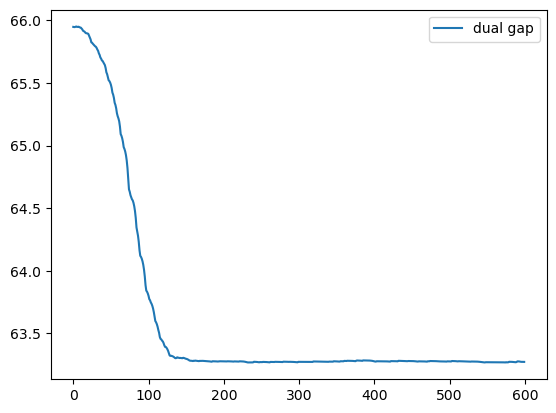

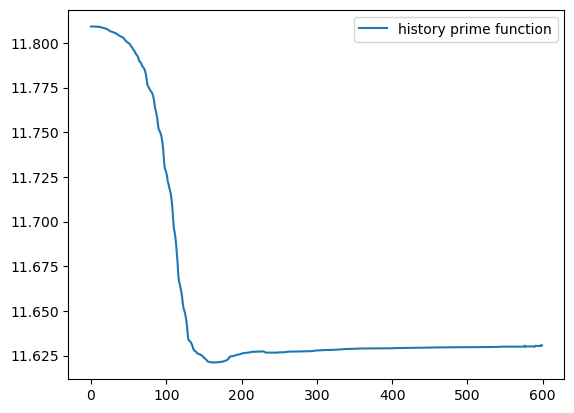

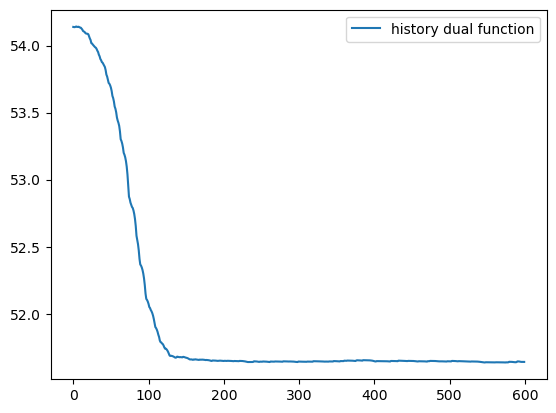

In [24]:
plt.plot(dgap_log, label="dual gap")
plt.legend()
plt.show()

plt.plot(history_prime_values, label="history prime function")
plt.legend()
plt.show()

plt.plot(history_dual_values, label="history dual function")
plt.legend()
plt.show()

In [10]:
# расчет прямой функции
vars = np.zeros(oracle_stacker.parameters_vector_size)  # dual costs w
_ = oracle_stacker(vars)
print("prime function value: ", oracle_stacker.get_prime_value())

vars block grad:  0.0
t in optim params grad:  0.0 0.0
la in optim params grad:  26.219936940859927
mu in optim params grad:  26.261383907437413
norm T:  0.0
grad dF dla:  0.12239030463886905
grad dF dmu:  0.1221871790671455
prime function value:  19.05361456152633
